In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import math
from datetime import datetime

## Analyzing the old customer data and finding insights from it

In [2]:
df=pd.read_csv('combined.csv')
df.head()

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,0,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,110.56
1,1,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.02
2,2,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.28
3,3,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.10
4,4,1,060 Morning Avenue,2016,NSW,Australia,10,Laraine,Medendorp,Female,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,17.87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19329 entries, 0 to 19328
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           19329 non-null  int64  
 1   customer_id                          19329 non-null  int64  
 2   address                              19329 non-null  object 
 3   postcode                             19329 non-null  int64  
 4   state                                19329 non-null  object 
 5   country                              19329 non-null  object 
 6   property_valuation                   19329 non-null  int64  
 7   first_name                           19329 non-null  object 
 8   last_name                            18710 non-null  object 
 9   gender                               19329 non-null  object 
 10  past_3_years_bike_related_purchases  19329 non-null  int64  
 11  DOB                         

In [4]:
df['gender'].value_counts()

gen=[0,0]
for i in df['gender']:
    if(i=='Female'):
        gen[0]+=1
    elif(i=='Male'):
        gen[1]+=1

In [5]:
c_id=df['customer_id'].unique()

In [6]:
sale= [0,0]
count={}
c=df['customer_id'].value_counts()
for i in c_id:
        count[i]=df['past_3_years_bike_related_purchases'][df['customer_id']==i].sum()
for i in c_id:
    a= df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'][df['customer_id']==i].sum()
    a/=c[i]
    sale[0]+=a
    b = df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'][df['customer_id']==i].sum()
    b/=c[i]
    sale[1]+=b
sales={'Female':math.trunc(sale[0]),'Male':math.trunc(sale[1])}


Text(0.5, 1.0, 'Percentage share of bikes bought on basis of gender')

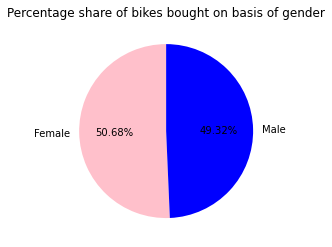

In [7]:
label=['Female','Male']
no=[int(sale[0]),int(sale[1])]
color=['pink','blue']
plt.pie(no,labels=label,colors=color,startangle=90,autopct="%.2f%%")
plt.title('Percentage share of bikes bought on basis of gender')

In [8]:
names = list(sales.keys())
values = list(sales.values())

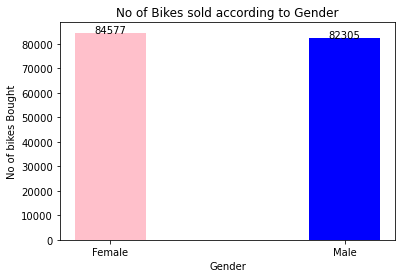

In [9]:
plt.bar(range(len(sales)),values,tick_label=names,width=0.3,color=['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('No of bikes Bought')
plt.title('No of Bikes sold according to Gender')
for i in range(len(no)):
    plt.text(x = i, y = no[i]+0.25, s = no[i], size = 10,horizontalalignment='center')

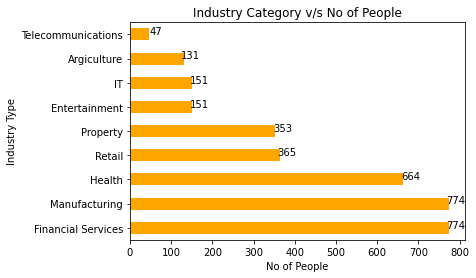

In [10]:
df['job_industry_category'][df['customer_id'].unique()].value_counts()[:].plot(kind='barh',color='orange')
ind=df['job_industry_category'][df['customer_id'].unique()].value_counts()
plt.xlabel('No of People')
plt.ylabel('Industry Type')
plt.title('Industry Category v/s No of People')
ind_val=[697,607,587,394,171,139,119,81,56]
for k in range(len(ind_val)):
    plt.text(y =k, x = ind[k]+17, s = ind[k], size = 10,horizontalalignment='center')

In [11]:
car= [0,0]
count={}
c=df['customer_id'].value_counts()
for i in c_id:
        count[i]=df['past_3_years_bike_related_purchases'][df['customer_id']==i].sum()
for i in c_id:
    a= df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'][df['customer_id']==i].sum()
    a/=c[i]
    sale[0]+=a
    b = df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'][df['customer_id']==i].sum()
    b/=c[i]
    sale[1]+=b
sales={'Female':math.trunc(sale[0]),'Male':math.trunc(sale[1])}



{'NSW': 990, 'VIC': 352, 'QLD': 318} {'NSW': 921, 'VIC': 507, 'QLD': 322}


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


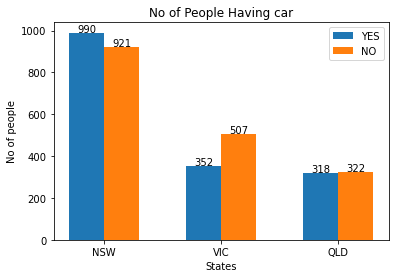

In [12]:
car_yes=dict(df['state'][df['customer_id'].unique()][df['owns_car']=='Yes'].value_counts())
car_no=dict(df['state'][df['customer_id'].unique()][df['owns_car']=='No'].value_counts())
print(car_yes,car_no)

car_yes_keys=list(car_yes.keys())
car_no_keys=list(car_yes.keys())

states=list(car_yes.keys())
car_yes=list(car_yes.values())
car_no=list(car_no.values())
x_loc=np.arange(len(states))
plt.xticks(x_loc,states)
plt.bar(x_loc-0.15,car_yes,width=0.3,label="YES")
plt.bar(x_loc+0.15,car_no,width=0.3,label="NO")
plt.legend()
plt.xlabel('States')
plt.ylabel('No of people')
plt.title('No of People Having car')

for i in range(len(states)):
    plt.annotate(s=car_yes[i],xy=(x_loc[i]-0.15,car_yes[i]+5),horizontalalignment='center')
    plt.annotate(s=car_no[i],xy=(x_loc[i]+0.15,car_no[i]+5),horizontalalignment='center')
plt.show()



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


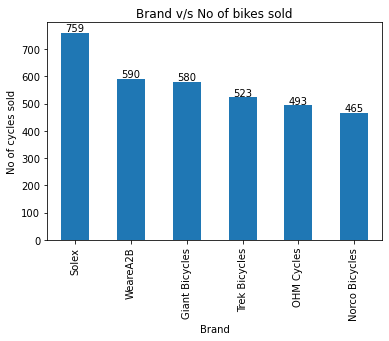

In [13]:
df['Age'].head().mean()

df['customer_id'].unique().shape

brand=dict(df['brand'][df['customer_id'].unique()].value_counts())
brand_name=list(brand.keys())
brand_sales=list(brand.values())
brand_name
bs=np.arange(len(brand_name))

df['brand'][df['customer_id'].unique()].value_counts()[:].plot(kind='bar')
plt.title('Brand v/s No of bikes sold')
plt.xlabel('Brand')
plt.ylabel('No of cycles sold')
for i in range(len(brand_name)):
    plt.annotate(s=brand_sales[i],xy=(bs[i],brand_sales[i]+5),horizontalalignment='center')



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


Text(0, 0.5, 'Product line')

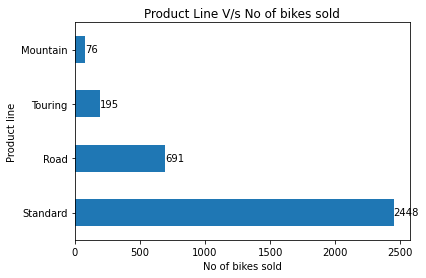

In [14]:
df['product_line'][df['customer_id'].unique()].value_counts().plot(kind='barh')
pline=dict(df['product_line'][df['customer_id'].unique()].value_counts())
pline_keys=list(pline.keys())
pline_values=list(pline.values())
pl=np.arange(len(pline_keys))
for i in range(len(pline_keys)):
    plt.annotate(s=pline_values[i],xy=(pline_values[i],pl[i]),verticalalignment='center')
plt.title('Product Line V/s No of bikes sold')
plt.xlabel('No of bikes sold')
plt.ylabel('Product line')

(array([105., 166., 150., 150., 185., 281.,  47., 171., 113., 209.]),
 array([19.47 , 24.288, 29.106, 33.924, 38.742, 43.56 , 48.378, 53.196,
        58.014, 62.832, 67.65 ]),
 <BarContainer object of 10 artists>)

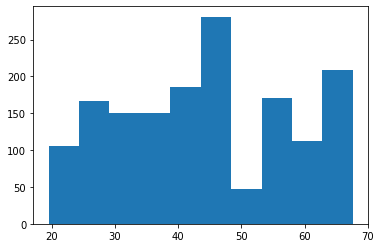

In [15]:
len_=len(df['Age'][df['customer_id'].unique()])
mean,median=int(df['Age'][df['customer_id'].unique()].mean()),int(df['Age'][df['customer_id'].unique()].median())
mean,median
stdv_age=df['Age'][df['customer_id'].unique()].std()
stdv_age

plt.hist(list(df['Age'][df['customer_id'].unique()][df['gender']=='Male']))

(array([ 86., 121., 160., 145., 315., 370., 189., 113., 140., 188.]),
 array([19.77 , 24.581, 29.392, 34.203, 39.014, 43.825, 48.636, 53.447,
        58.258, 63.069, 67.88 ]),
 <BarContainer object of 10 artists>)

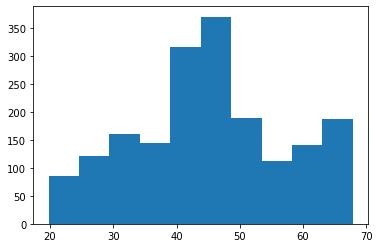

In [16]:
plt.hist(list(df['Age'][df['customer_id'].unique()][df['gender']=='Female']))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


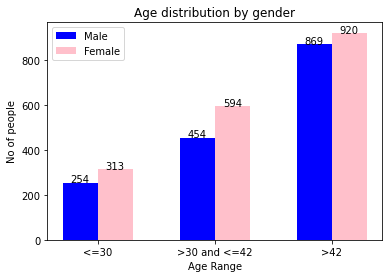

In [17]:
g1_female=0
g2_female=0
g3_female=0
g1_male=0
g2_male=0
g3_male=0
g1=int(mean-stdv_age)
g3=int(mean+stdv_age)


df['gender'][df['customer_id'].unique()].value_counts()

j=0
for i in df['gender'][df['customer_id'].unique()]:
    if(i=='Female' and df['Age'][j]<=g1):
        g1_female+=1
    elif(i=='Female' and df['Age'][j]>g1 and df['Age'][j]<=mean):
        g2_female+=1
    elif(i=='Female' and df['Age'][j]>mean):
        g3_female+=1
    elif(i=='Male' and df['Age'][j]<=g1):
        g1_male+=1
    elif(i=='Male' and df['Age'][j]>g1 and df['Age'][j]<=mean):
        g2_male+=1
    elif(i=='Male' and df['Age'][j]>mean):
        g3_male+=1
    j+=1

g1_male,g2_male,g3_male,g1_female,g2_female,g3_female

male_age=[g1_male,g2_male,g3_male]
female_age=[g1_female,g2_female,g3_female]
age_=np.arange(3)
plt.bar(age_-0.15,male_age,width=0.3,color='blue',label='Male')
plt.bar(age_+0.15,female_age,width=0.3,color='pink',label='Female')
age_range=['<=30','>30 and <=42','>42']
plt.xticks(age_,age_range)
plt.ylabel('No of people')
plt.xlabel('Age Range')
plt.legend()
plt.title('Age distribution by gender')
for i in range(len(age_)):
    plt.annotate(s=male_age[i],xy=(age_[i]-0.15,male_age[i]),horizontalalignment='center')
    plt.annotate(s=female_age[i],xy=(age_[i]+0.15,female_age[i]),horizontalalignment='center')



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:102: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:103: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:104: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


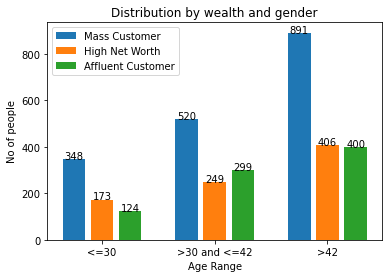

In [18]:
df['wealth_segment'].value_counts()

m_a1_mass=0
m_a1_high=0
m_a1_aff=0

m_a2_mass=0
m_a2_high=0
m_a2_aff=0

m_a3_mass=0
m_a3_high=0
m_a3_aff=0

f_a1_mass=0
f_a1_high=0
f_a1_aff=0

f_a2_mass=0
f_a2_high=0
f_a2_aff=0

f_a3_mass=0
f_a3_high=0
f_a3_aff=0


for i in df['wealth_segment'][df['customer_id'].unique()]:
    if(i=='Mass Customer' and df['Age'][j]<=g1 and df['gender'][j]=='Male'):
        m_a1_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]<=g1 and df['gender'][j]=='Male'):
        m_a1_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]<=g1 and df['gender'][j]=='Male'):
        m_a1_aff+=1
    elif(i=='Mass Customer' and df['Age'][j]<=g1 and df['gender'][j]=='Female'):
        f_a1_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]<=g1 and df['gender'][j]=='Female'):
        f_a1_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]<=g1 and df['gender'][j]=='Female'):
        f_a1_aff+=1
        
    elif(i=='Mass Customer' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Male'):
        m_a2_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Male'):
        m_a2_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Male'):
        m_a2_aff+=1
    elif(i=='Mass Customer' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Female'):
        f_a2_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Female'):
        f_a2_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]>g1 and df['Age'][j]<=mean and df['gender'][j]=='Female'):
        f_a2_aff+=1
        
    elif(i=='Mass Customer' and df['Age'][j]>mean and df['gender'][j]=='Male'):
        m_a3_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]>mean and df['gender'][j]=='Male'):
        m_a3_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]>mean and df['gender'][j]=='Male'):
        m_a3_aff+=1
    elif(i=='Mass Customer' and df['Age'][j]>mean and df['gender'][j]=='Female'):
        f_a3_mass+=1
    elif(i=='High Net Worth' and df['Age'][j]>mean and df['gender'][j]=='Female'):
        f_a3_high+=1
    elif(i=='Affluent Customer' and df['Age'][j]>mean and df['gender'][j]=='Female'):
        f_a3_aff+=1
    j+=1


m_a1_mass,m_a1_high,m_a1_aff

m_a2_mass,m_a2_high,m_a2_aff

m_a3_mass,m_a3_high,m_a3_aff

f_a1_mass,f_a1_high,f_a1_aff

f_a2_mass,f_a2_high,f_a2_aff

f_a3_mass,f_a3_high,f_a3_aff

age1_w=[m_a1_mass+f_a1_mass,m_a2_mass+f_a2_mass,m_a3_mass+f_a3_mass]
age2_w=[m_a1_high+f_a1_high,m_a2_high+f_a2_high,m_a3_high+f_a3_high]
age3_w=[m_a1_aff+f_a1_aff,m_a2_aff+f_a2_aff,m_a3_aff+f_a3_aff]


age_w=np.arange(3)
colors=['yellow','red','blue']
labels=['Mass Customer','High Net Worth','Affluent Customer']
plt.bar(age_w-0.25,age1_w,width=0.2,label=labels[0])
plt.bar(age_w,age2_w,width=0.2,label=labels[1])
plt.bar(age_w+0.25,age3_w,width=0.2,label=labels[2])


age_range=['<=30','>30 and <=42','>42']
plt.xticks(age_w,age_range)
plt.ylabel('No of people')
plt.xlabel('Age Range')
plt.legend()
plt.title('Distribution by wealth and gender')
for i in range(len(age_w)):
    plt.annotate(s=age1_w[i],xy=(age_w[i]-0.25,age1_w[i]),horizontalalignment='center')
    plt.annotate(s=age2_w[i],xy=(age_w[i],age2_w[i]),horizontalalignment='center')
    plt.annotate(s=age3_w[i],xy=(age_w[i]+0.25,age3_w[i]),horizontalalignment='center')



## Analyzing the Data from new customer list

In [19]:
df_new=pd.read_excel('',sheet_name='NewCustomerList')
df_new.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


In [20]:
df_new.columns=['']* len(df_new.columns)
list(df_new.columns)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [21]:
df_new.columns =df_new.iloc[0]
df_new.drop(0,inplace=True)

In [22]:
df_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [23]:
gen=[0,0]
for i in df_new['gender']:
    if(i=='Female'):
        gen[0]+=1
    elif(i=='Male'):
        gen[1]+=1
gen

[513, 470]

In [24]:
df_new['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [25]:
df_new.drop(df_new[df_new['gender'] == 'U'].index, inplace = True) 

In [26]:
print(df_new.isnull().sum())

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
Rank                                     0
Value                                    0
dtype: in

In [27]:
df_new["job_industry_category"].fillna(method="ffill",inplace=True)
df_new["job_industry_category"].fillna(method="bfill",inplace=True)
df_new=df_new[["first_name","last_name","gender","past_3_years_bike_related_purchases","DOB","job_title","job_industry_category","wealth_segment","deceased_indicator","owns_car","tenure","address","postcode","state","country","property_valuation"]]
print(df_new.isnull().sum())

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 1 to 1000
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           983 non-null    object
 1   last_name                            954 non-null    object
 2   gender                               983 non-null    object
 3   past_3_years_bike_related_purchases  983 non-null    object
 4   DOB                                  983 non-null    object
 5   job_title                            878 non-null    object
 6   job_industry_category                983 non-null    object
 7   wealth_segment                       983 non-null    object
 8   deceased_indicator                   983 non-null    object
 9   owns_car                             983 non-null    object
 10  tenure                               983 non-null    object
 11  address                              983 non

In [29]:
sale=[0,0]
sale[0]=df_new['past_3_years_bike_related_purchases'][df_new['gender']=='Female'].count()
sale[1]=df_new['past_3_years_bike_related_purchases'][df_new['gender']=='Male'].count()
sales={'Female':sale[0],'Male':sale[1]}
sales

{'Female': 513, 'Male': 470}

Text(0.5, 1.0, 'Percentage share of bikes bought on basis of gender')

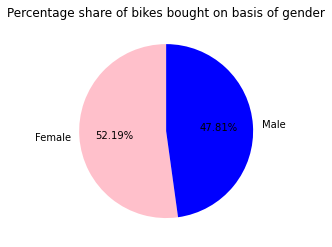

In [30]:
label=['Female','Male']
no=[int(sale[0]),int(sale[1])]
color=['pink','blue']
plt.pie(no,labels=label,colors=color,startangle=90,autopct="%.2f%%")
plt.title('Percentage share of bikes bought on basis of gender')



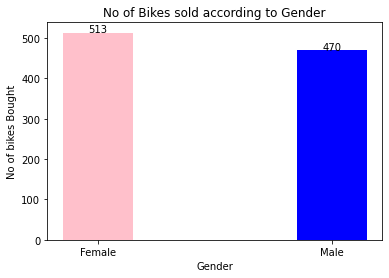

In [31]:
names = list(sales.keys())
values = list(sales.values())

plt.bar(range(len(sales)),values,tick_label=names,width=0.3,color=['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('No of bikes Bought')
plt.title('No of Bikes sold according to Gender')
for i in range(len(no)):
    plt.text(x = i, y = no[i]+0.25, s = no[i], size = 10,horizontalalignment='center')

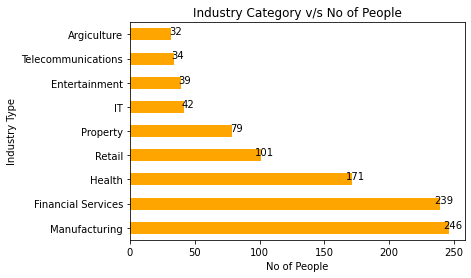

In [32]:
df_new['job_industry_category'].value_counts()[:].plot(kind='barh',color='orange')
ind=df_new['job_industry_category'].value_counts()
plt.xlabel('No of People')
plt.ylabel('Industry Type')
plt.title('Industry Category v/s No of People')
ind_val=[203,199,152,78,64,51,37,26,25]
for k in range(len(ind_val)):
    plt.text(y =k, x = ind[k]+3, s = ind[k], size = 10,horizontalalignment='center')


{'NSW': 232, 'VIC': 129, 'QLD': 125} {'NSW': 267, 'VIC': 129, 'QLD': 101}


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


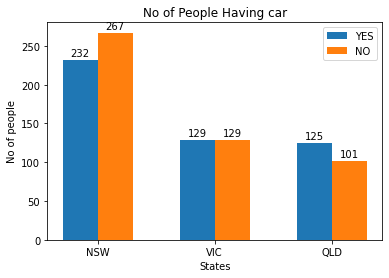

In [33]:
ind=df_new['job_industry_category'].value_counts()
ind

car_yes=dict(df_new['state'][df_new['owns_car']=='Yes'].value_counts())
car_no=dict(df_new['state'][df_new['owns_car']=='No'].value_counts())
print(car_yes,car_no)

car_yes_keys=list(car_yes.keys())
car_no_keys=list(car_yes.keys())

states=list(car_yes.keys())
car_yes=list(car_yes.values())
car_no=list(car_no.values())
x_loc=np.arange(len(states))
plt.xticks(x_loc,states)
plt.bar(x_loc-0.15,car_yes,width=0.3,label="YES")
plt.bar(x_loc+0.15,car_no,width=0.3,label="NO")
plt.legend()
plt.xlabel('States')
plt.ylabel('No of people')
plt.title('No of People Having car')

for i in range(len(states)):
    plt.annotate(s=car_yes[i],xy=(x_loc[i]-0.15,car_yes[i]+5),horizontalalignment='center')
    plt.annotate(s=car_no[i],xy=(x_loc[i]+0.15,car_no[i]+5),horizontalalignment='center')
plt.show()

In [34]:
df_new["DOB"]=pd.to_datetime(df_new["DOB"])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
now = datetime.now()
df_new['Age']=round((now - df_new['DOB']).dt.total_seconds() / (60*60*24*365.25),2)
df_new['Age']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1       64.13
2       51.44
3       47.00
4       42.58
5       55.93
        ...  
996     61.89
997     19.86
998     66.90
999     68.69
1000    65.90
Name: Age, Length: 983, dtype: float64

(array([51., 53., 27., 63., 56., 55., 47., 54., 37., 27.]),
 array([19.65 , 26.007, 32.364, 38.721, 45.078, 51.435, 57.792, 64.149,
        70.506, 76.863, 83.22 ]),
 <BarContainer object of 10 artists>)

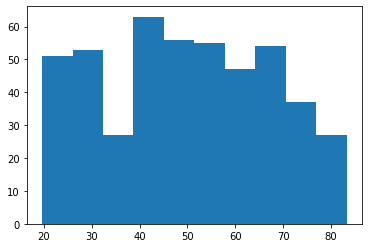

In [36]:
len_=len(df_new['Age'])
mean,median=int(df_new['Age'].mean()),int(df_new['Age'].median())
mean,median
stdv_age=df_new['Age'].std()
mean,median

plt.hist(list(df_new['Age'][df_new['gender']=='Male']))

(array([47., 46., 27., 67., 80., 59., 63., 57., 25., 42.]),
 array([19.5  , 25.856, 32.212, 38.568, 44.924, 51.28 , 57.636, 63.992,
        70.348, 76.704, 83.06 ]),
 <BarContainer object of 10 artists>)

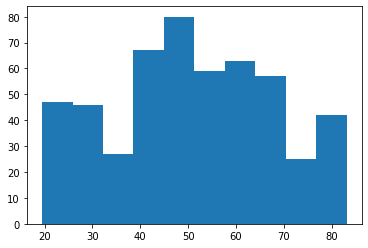

In [37]:
plt.hist(list(df_new['Age'][df_new['gender']=='Female']))


In [38]:
g1=int(mean-stdv_age)
g3=int(mean+stdv_age)


In [39]:
df_new['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


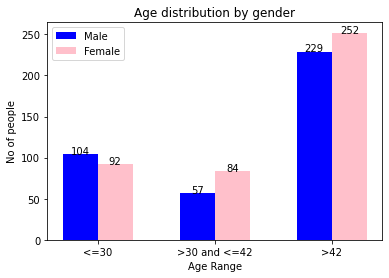

In [40]:
a1=dict(df_new['gender'][df_new['Age']<=g1].value_counts())
a1

a3=dict(df_new['gender'][df_new['Age']>mean].value_counts())
a3

a2={'Female':428-(a3['Female']+a1['Female']),'Male':390-(a3['Male']+a1['Male'])}
a2

male_age=[a1['Male'],a2['Male'],a3['Male']]
female_age=[a1['Female'],a2['Female'],a3['Female']]
age_=np.arange(3)
plt.bar(age_-0.15,male_age,width=0.3,color='blue',label='Male')
plt.bar(age_+0.15,female_age,width=0.3,color='pink',label='Female')
age_range=['<=30','>30 and <=42','>42']
plt.xticks(age_,age_range)
plt.ylabel('No of people')
plt.xlabel('Age Range')
plt.legend()
plt.title('Age distribution by gender')
for i in range(len(age_)):
    plt.annotate(s=male_age[i],xy=(age_[i]-0.15,male_age[i]),horizontalalignment='center')
    plt.annotate(s=female_age[i],xy=(age_[i]+0.15,female_age[i]),horizontalalignment='center')


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


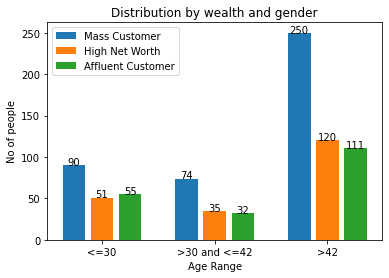

In [41]:
df_new['wealth_segment'].value_counts()

a1_m=dict(df_new['wealth_segment'][df_new['Age']<=g1][df_new['gender']=='Male'].value_counts())
a1_m

a3_m=dict(df_new['wealth_segment'][df_new['Age']>mean][df_new['gender']=='Male'].value_counts())
a3_m

a3_f=dict(df_new['wealth_segment'][df_new['Age']>mean][df_new['gender']=='Female'].value_counts())
a3_f

a1_f=dict(df_new['wealth_segment'][df_new['Age']<=g1][df_new['gender']=='Female'].value_counts())
a1_f

a2_={'Mass Customer':414-(a1_m['Mass Customer']+a3_m['Mass Customer']+a1_f['Mass Customer']+a3_f['Mass Customer']),
         'High Net Worth':206-(a1_m['High Net Worth']+a3_m['High Net Worth']+a1_f['High Net Worth']+a3_f['High Net Worth']),
         'Affluent Customer':198-(a1_m['Affluent Customer']+a3_m['Affluent Customer']+a1_f['Affluent Customer']+a3_f['Affluent Customer'])}
a2_

age1_w=[a1_m['Mass Customer']+a1_f['Mass Customer'],a2_['Mass Customer'],a3_m['Mass Customer']+a3_f['Mass Customer']]
age2_w=[a1_m['High Net Worth']+a1_f['High Net Worth'],a2_['High Net Worth'],a3_m['High Net Worth']+a3_f['High Net Worth']]
age3_w=[a1_m['Affluent Customer']+a1_f['Affluent Customer'],a2_['Affluent Customer'],a3_m['Affluent Customer']+a3_f['Affluent Customer']]


age_w=np.arange(3)
colors=['yellow','red','blue']
labels=['Mass Customer','High Net Worth','Affluent Customer']
plt.bar(age_w-0.25,age1_w,width=0.2,label=labels[0])
plt.bar(age_w,age2_w,width=0.2,label=labels[1])
plt.bar(age_w+0.25,age3_w,width=0.2,label=labels[2])


age_range=['<=30','>30 and <=42','>42']
plt.xticks(age_w,age_range)
plt.ylabel('No of people')
plt.xlabel('Age Range')
plt.legend()
plt.title('Distribution by wealth and gender')
for i in range(len(age_w)):
    plt.annotate(s=age1_w[i],xy=(age_w[i]-0.25,age1_w[i]),horizontalalignment='center')
    plt.annotate(s=age2_w[i],xy=(age_w[i],age2_w[i]),horizontalalignment='center')
    plt.annotate(s=age3_w[i],xy=(age_w[i]+0.25,age3_w[i]),horizontalalignment='center')

